Assignment 1: Perform thresholding operation in an image and evaluate its histogram using histogram equalisation

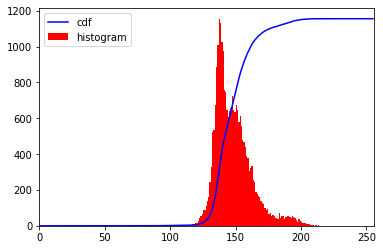

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/histogramequalizer.png',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [2]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [3]:
img2 = cdf[img]

In [4]:
img = cv2.imread('/content/histogramequalizer.png',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

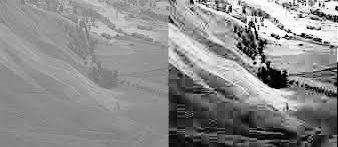

In [8]:
from IPython.display import Image, display
display(Image('res.png'))